Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [3]:
# load the data from csv file to Pandas DataFrame
student_data = pd.read_csv('data.csv')

In [4]:
# printing the first 5 rows of the dataframe
student_data.head()

,StudentID,Graduated,Year,Name,Gender,Age,GPA,Attendance,Scholarship,Course,FeePaid,Department,City
0,1,0,3,Budi Santoso,male,20,2.5,75,1,CS101,1500,NaN,Jakarta
1,2,1,1,Siti Aisyah,female,22,3.8,90,1,ENG201,2000,A45,Surabaya
2,3,0,3,Ayu Lestari,female,19,2.8,60,0,MATH150,1500,NaN,Bandung
3,4,1,2,Agus Susanto,male,21,3.2,85,0,CS102,1700,NaN,Medan
4,5,0,3,Andi Wijaya,male,23,2.3,55,0,ENG101,1300,NaN,Palembang


In [5]:
# number of rows and Columns
student_data.shape

(15, 13)

In [6]:
# getting some informations about the data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StudentID    15 non-null     int64  
 1   Graduated    15 non-null     int64  
 2   Year         15 non-null     int64  
 3   Name         15 non-null     object 
 4   Gender       15 non-null     object 
 5   Age          15 non-null     int64  
 6   GPA          15 non-null     float64
 7   Attendance   15 non-null     int64  
 8   Scholarship  15 non-null     int64  
 9   Course       15 non-null     object 
 10  FeePaid      15 non-null     int64  
 11  Department   3 non-null      object 
 12  City         15 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ KB


In [7]:
# check the number of missing values in each column
student_data.isnull().sum()

StudentID       0
Graduated       0
Year            0
Name            0
Gender          0
Age             0
GPA             0
Attendance      0
Scholarship     0
Course          0
FeePaid         0
Department     12
City            0
dtype: int64

Handling the Missing values

In [8]:
# Drop the "Department" column from the DataFrame
student_data = student_data.drop(columns='Department', axis=1)

In [9]:
# Replace missing values in the "City" column with the mode value
mode_city_value = student_data['City'].mode()[0]
student_data['City'].fillna(mode_city_value, inplace=True)

In [10]:
# finding the mode value of "City" column
print(student_data['City'].mode())

0      Balikpapan
1         Bandung
2     Banjarmasin
3           Bogor
4        Denpasar
5         Jakarta
6        Makassar
7          Malang
8           Medan
9       Palembang
10      Pontianak
11      Samarinda
12       Semarang
13       Surabaya
14     Yogyakarta
Name: City, dtype: object


In [11]:
print(student_data['City'].mode()[0])

Balikpapan


In [12]:
# Replace missing values in "Course" column with mode value
student_data['Course'].fillna(student_data['Course'].mode()[0], inplace=True)

In [13]:
# Check the number of missing values in each column
print(student_data.isnull().sum())

StudentID      0
Graduated      0
Year           0
Name           0
Gender         0
Age            0
GPA            0
Attendance     0
Scholarship    0
Course         0
FeePaid        0
City           0
dtype: int64


Data Analysis

In [14]:
# getting some statistical measures about the data
student_data.describe()

,StudentID,Graduated,Year,Age,GPA,Attendance,Scholarship,FeePaid
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,0.466667,2.266667,21.400000,3.020000,75.066667,0.400000,1693.333333
std,4.472136,0.516398,0.798809,1.882248,0.491644,14.498604,0.507093,353.486041
min,1.000000,0.000000,1.000000,18.000000,2.300000,55.000000,0.000000,1200.000000
25%,4.500000,0.000000,2.000000,20.000000,2.650000,62.500000,0.000000,1500.000000
50%,8.000000,0.000000,2.000000,21.000000,2.900000,75.000000,0.000000,1600.000000
75%,11.500000,1.000000,3.000000,22.500000,3.450000,89.000000,1.000000,1900.000000
max,15.000000,1.000000,3.000000,25.000000,3.800000,95.000000,1.000000,2500.000000


In [15]:
# finding the number of people graduated and not graduated
student_data['Graduated'].value_counts()

Graduated
0    8
1    7
Name: count, dtype: int64

Data Visualization

In [16]:
sns.set()

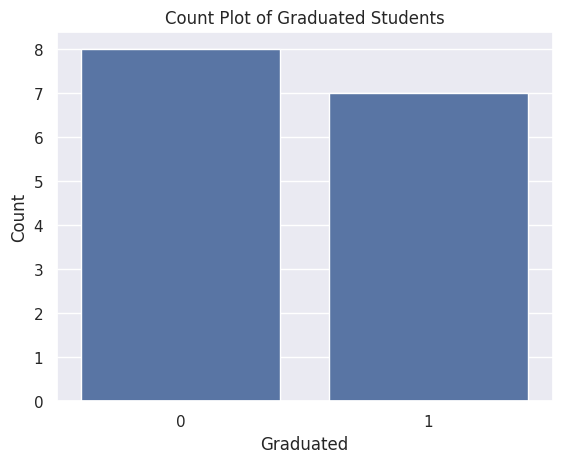

In [17]:
# making a count plot for "Graduated" column
sns.countplot(x='Graduated', data=student_data)

plt.title('Count Plot of Graduated Students')
plt.xlabel('Graduated')
plt.ylabel('Count')
plt.show()

In [18]:
gender_counts = student_data['Gender'].value_counts()

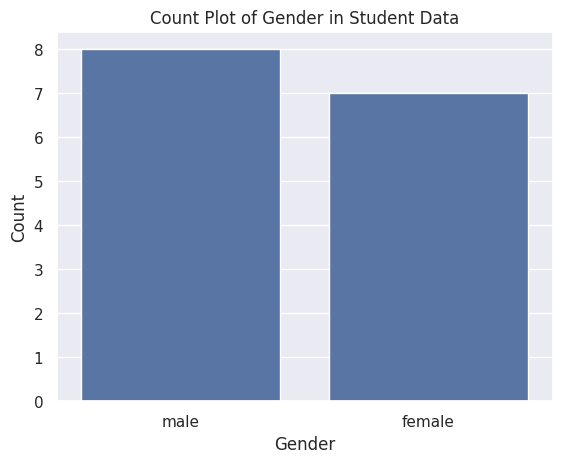

In [19]:
# making a count plot for "Gender" column
sns.countplot(x='Gender', data=student_data)

plt.title('Count Plot of Gender in Student Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

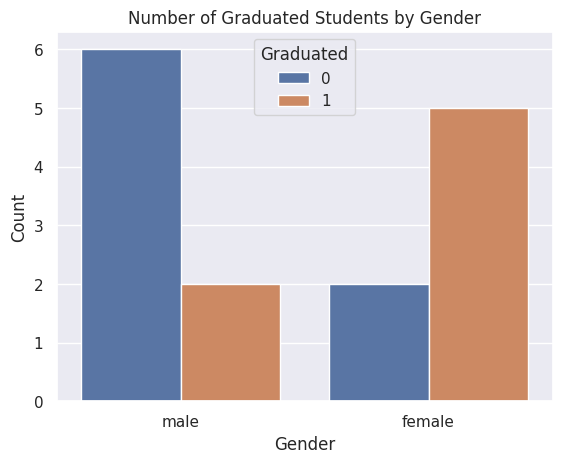

In [20]:
# number of Graduated Students by Gender
sns.countplot(x='Gender', hue='Graduated', data=student_data)

plt.title('Number of Graduated Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

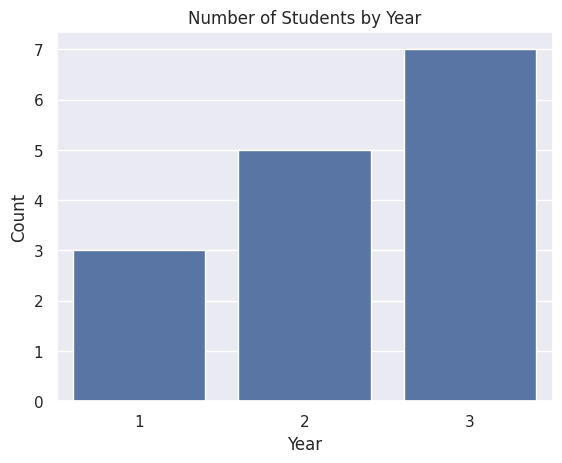

In [21]:
# making a count plot for "Year" Column
sns.countplot(x='Year', data=student_data)

plt.title('Number of Students by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

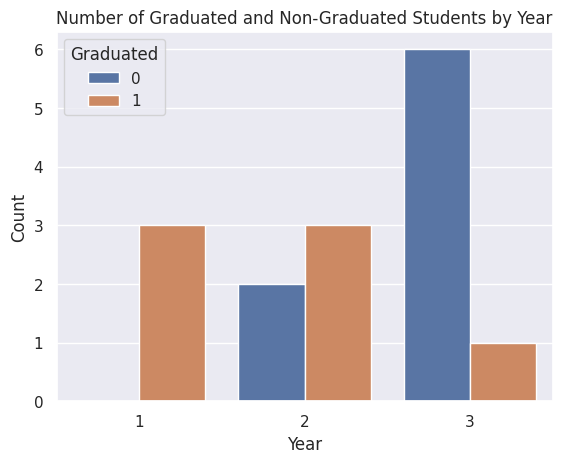

In [22]:
sns.countplot(x='Year', hue='Graduated', data=student_data)

plt.title('Number of Graduated and Non-Graduated Students by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Encoding the Categorical Columns

In [23]:
student_data['Gender'].value_counts()

Gender
male      8
female    7
Name: count, dtype: int64

In [24]:
student_data['City'].value_counts()

City
Jakarta        1
Surabaya       1
Bandung        1
Medan          1
Palembang      1
Makassar       1
Yogyakarta     1
Semarang       1
Balikpapan     1
Malang         1
Bogor          1
Denpasar       1
Pontianak      1
Samarinda      1
Banjarmasin    1
Name: count, dtype: int64

In [25]:
# converting categorical Columns

student_data.replace({'Gender': {'male': 0, 'female': 1}, 'City': {'Jakarta': 0, 'Surabaya': 1, 'Bandung': 2, 'Medan': 3, 'Palembang': 4,
                                                                  'Makassar': 5, 'Yogyakarta': 6, 'Semarang': 7, 'Balikpapan': 8, 'Malang': 9,
                                                                  'Bogor': 10, 'Denpasar': 11, 'Pontianak': 12, 'Samarinda': 13, 'Banjarmasin': 14}}, inplace=True)

In [26]:
student_data.head()

,StudentID,Graduated,Year,Name,Gender,Age,GPA,Attendance,Scholarship,Course,FeePaid,City
0,1,0,3,Budi Santoso,0,20,2.5,75,1,CS101,1500,0
1,2,1,1,Siti Aisyah,1,22,3.8,90,1,ENG201,2000,1
2,3,0,3,Ayu Lestari,1,19,2.8,60,0,MATH150,1500,2
3,4,1,2,Agus Susanto,0,21,3.2,85,0,CS102,1700,3
4,5,0,3,Andi Wijaya,0,23,2.3,55,0,ENG101,1300,4


Separating features & Target

In [27]:
X = student_data.drop(columns=['StudentID', 'Name', 'Course', 'City'], axis=1)
Y = student_data['Graduated']

In [28]:
print(X)

    Graduated  Year  Gender  Age  GPA  Attendance  Scholarship  FeePaid
0           0     3       0   20  2.5          75            1     1500
1           1     1       1   22  3.8          90            1     2000
2           0     3       1   19  2.8          60            0     1500
3           1     2       0   21  3.2          85            0     1700
4           0     3       0   23  2.3          55            0     1300
5           1     1       1   20  3.6          95            1     2500
6           1     3       0   22  3.1          80            1     1600
7           0     2       0   24  2.7          70            0     1200
8           0     3       0   18  2.9          65            0     1400
9           1     2       1   21  3.4          88            0     1800
10          1     1       1   25  3.7          93            1     2200
11          0     3       0   22  2.4          60            0     1500
12          0     3       1   20  2.6          55            0  

In [29]:
print(Y)

0     0
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    1
Name: Graduated, dtype: int64


Splitting the data into training data & Test data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(15, 8) (12, 8) (3, 8)


Model Training

Logistic Regression

In [32]:
model = LogisticRegression(max_iter=1000)

In [33]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [35]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [36]:
print(X_train_prediction)

[0 1 1 1 1 0 0 0 1 1 0 0]


In [37]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [39]:
print(X_test_prediction)

[0 0 1]


In [40]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
